In [119]:
import os

import numpy as np

import shutil
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [120]:
rootdir= 'C:/Users/Hp/Downloads/CroppedYale' #path of the original folder

classes = ['yaleB01' , 
               'yaleB02'  , 
               'yaleB03' , 
               'yaleB04' , 
               'yaleB05'  , 
               'yaleB06'  , 
               'yaleB07'  , 
               'yaleB08'  , 
               'yaleB09'  , 
               'yaleB10' , 
               'yaleB11' , 
               'yaleB12' , 
               'yaleB13' , 
               'yaleB15' , 
               'yaleB16' , 
               'yaleB17' , 
               'yaleB18' , 
               'yaleB19' , 
               'yaleB20' , 
               'yaleB21' , 
               'yaleB22' , 
               'yaleB23' , 
               'yaleB24' , 
               'yaleB25' , 
               'yaleB26' , 
               'yaleB27' , 
               'yaleB28' , 
               'yaleB29' , 
               'yaleB30' , 
               'yaleB31' , 
               'yaleB32' , 
               'yaleB33' , 
               'yaleB34' , 
               'yaleB35' , 
               'yaleB36' , 
               'yaleB37' , 
               'yaleB38' ,
               'yaleB39']

In [124]:
for i in classes:
    os.makedirs(rootdir +'/train/' + i)
    os.makedirs(rootdir +'/test/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)

    test_ratio = 0.2

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/test/' + i)

print(train_FileNames)


['C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-015E+20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+000E+45.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00_Ambient.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+085E+20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+020E+10.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+110E+40.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-050E+00.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-050E-40.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-070E+45.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+070E+45.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A-020E-10.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+000E+20.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+070E-35.jpg', 'C:/Users/Hp/Downloads/CroppedYale/yaleB39/yaleB39_P00A+005E-10.jpg', 'C:/Users/Hp/Downloa

In [125]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [126]:
train = ImageDataGenerator(rescale = 1/225)
validation = ImageDataGenerator(rescale = 1/225)

In [127]:
training_set = train.flow_from_directory('C:/Users/Hp/Downloads/CroppedYale/train',
                                                 target_size = (192,168),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 1933 images belonging to 38 classes.


In [128]:
test_set = validation.flow_from_directory('C:/Users/Hp/Downloads/CroppedYale/test',
                                            target_size = (192,168),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 516 images belonging to 38 classes.


In [129]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(192, 
                                                              168,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [135]:
num_classes = 38
input_shape = (192, 168, 3)

data_augmentation,
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
              
model_fit = model.fit(training_set , 
                     #steps_per_epoch = 3 ,
                     epochs = 15 ,
                     validation_data = test_set)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 192, 168, 32)      896       
                                                                 
 conv2d_30 (Conv2D)          (None, 192, 168, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 96, 84, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 96, 84, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 96, 84, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 96, 84, 64)        36928     
                                                     

In [136]:
train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)
print('train_acc: %.3f , test_acc: %.3f' %(train_acc ,test_acc))

C:\Users\Hp\AppData\Local\Temp/ipykernel_15088/322241077.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_15088/322241077.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)


train_acc: 1.000 , test_acc: 0.975


In [137]:
train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)
print('train_loss  %.3f, validation_loss: %.3f' %(train_loss ,validation_loss))

C:\Users\Hp\AppData\Local\Temp/ipykernel_15088/923909745.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss , train_acc = model.evaluate_generator(training_set , steps=16)     ###evaluate model
C:\Users\Hp\AppData\Local\Temp/ipykernel_15088/923909745.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_loss, test_acc = model.evaluate_generator(test_set , steps =16)


train_loss  0.000, validation_loss: 0.126


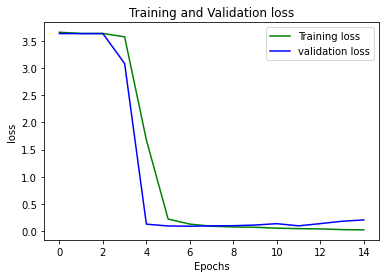

In [142]:
loss_train =model_fit.history['loss']
loss_val =  model_fit.history['val_loss']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()